C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA Model Evaluation:
RMSE: 1.39 °C
MAE: 1.15 °C


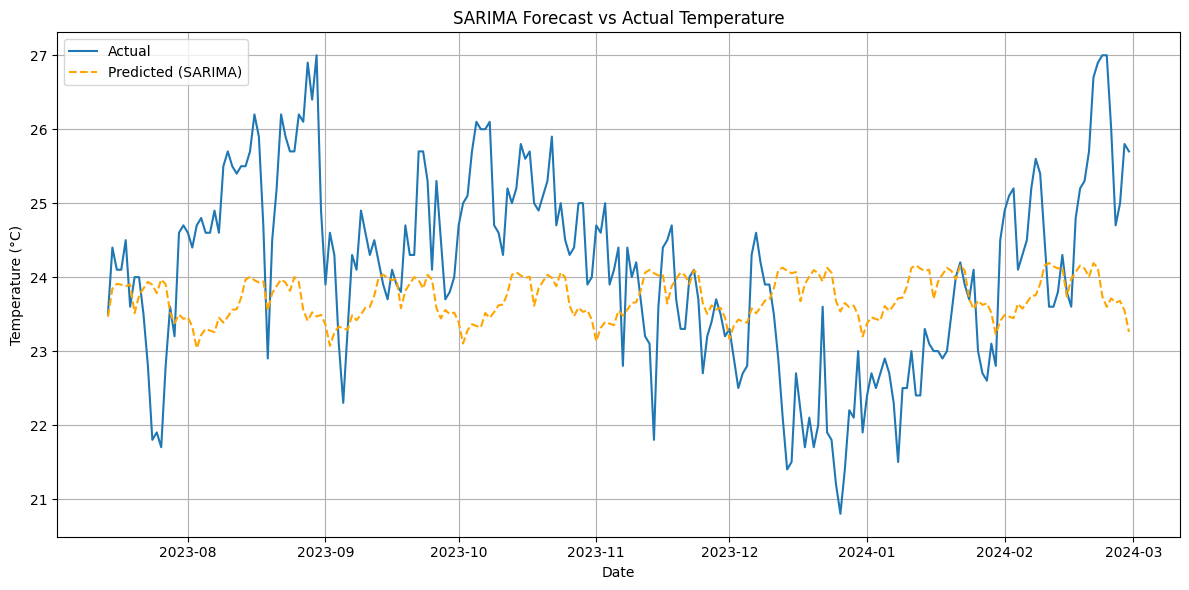

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load and preprocess dataset
df = pd.read_csv(r"C:\Users\admin\Desktop\re arima\Bengaluru 2021-01-01 to 2024-02-29.csv")
df['datetime'] = pd.to_datetime(df['datetime'], dayfirst=True)
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)
df['temp'] = df['temp'].interpolate()

# Train-test split
train_size = int(len(df) * 0.8)
train, test = df['temp'][:train_size], df['temp'][train_size:]

# Fit SARIMA model: (p,d,q)(P,D,Q,s)
# Example: (2,1,2)(1,1,1,365) for yearly seasonality
model_sarima = SARIMAX(train, 
                       order=(2, 1, 2), 
                       seasonal_order=(1, 1, 1, 30),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

model_fit_sarima = model_sarima.fit(disp=False)

# Forecast
forecast_sarima = model_fit_sarima.forecast(steps=len(test))

# Evaluation
rmse = np.sqrt(mean_squared_error(test, forecast_sarima))
mae = mean_absolute_error(test, forecast_sarima)
print(f"SARIMA Model Evaluation:\nRMSE: {rmse:.2f} °C\nMAE: {mae:.2f} °C")

# Plotting actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast_sarima, label='Predicted (SARIMA)', linestyle='--', color='orange')
plt.title("SARIMA Forecast vs Actual Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2073.002, Time=5.41 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2137.175, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2138.334, Time=0.46 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2137.460, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2135.186, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2070.831, Time=4.43 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2071.199, Time=2.25 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=2098.969, Time=9.15 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2089.624, Time=4.03 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=2081.878, Time=10.62 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=2068.071, Time=2.21 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2067.401, Time=1.40 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=2068.046, Time=1.28 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=2070.040, Time=2.81 sec
 ARIMA(0,1,2)(0,0,

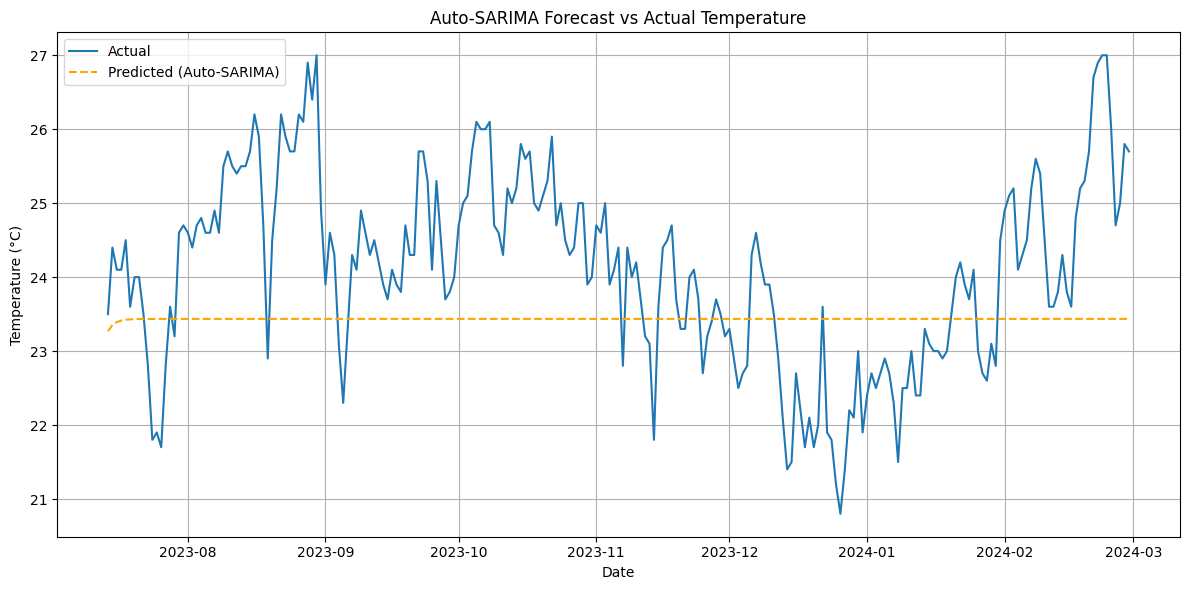

In [2]:
from pmdarima import auto_arima
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Load data
df = pd.read_csv("Bengaluru 2021-01-01 to 2024-02-29.csv")
df['datetime'] = pd.to_datetime(df['datetime'], dayfirst=True)
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)
df['temp'] = df['temp'].interpolate()

# Train-test split
train_size = int(len(df) * 0.8)
train, test = df['temp'][:train_size], df['temp'][train_size:]

# Fit auto_arima with seasonality enabled
model_auto = auto_arima(train,
                        seasonal=True,
                        m=12,  # Try m=7 (weekly) or m=12 (monthly-like)
                        trace=True,
                        stepwise=True,
                        suppress_warnings=True)

print("Best order:", model_auto.order)
print("Best seasonal_order:", model_auto.seasonal_order)

# Forecast
forecast_auto = model_auto.predict(n_periods=len(test))

# Evaluation
rmse = np.sqrt(mean_squared_error(test, forecast_auto))
mae = mean_absolute_error(test, forecast_auto)
print(f"\nAuto-SARIMA Evaluation:\nRMSE: {rmse:.2f} °C\nMAE: {mae:.2f} °C")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast_auto, label='Predicted (Auto-SARIMA)', linestyle='--', color='orange')
plt.title("Auto-SARIMA Forecast vs Actual Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


17:55:10 - cmdstanpy - INFO - Chain [1] start processing
17:55:11 - cmdstanpy - INFO - Chain [1] done processing


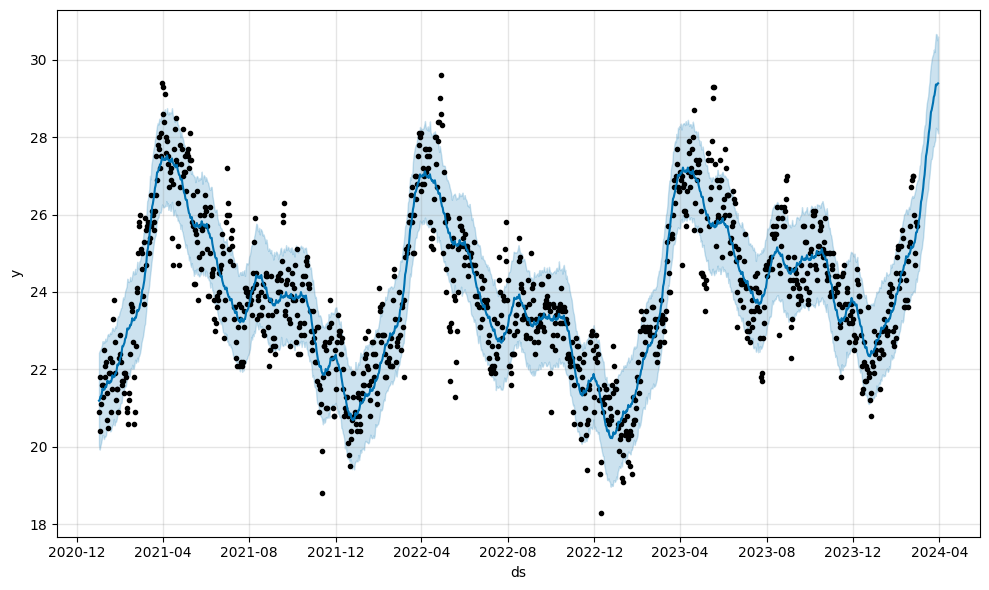

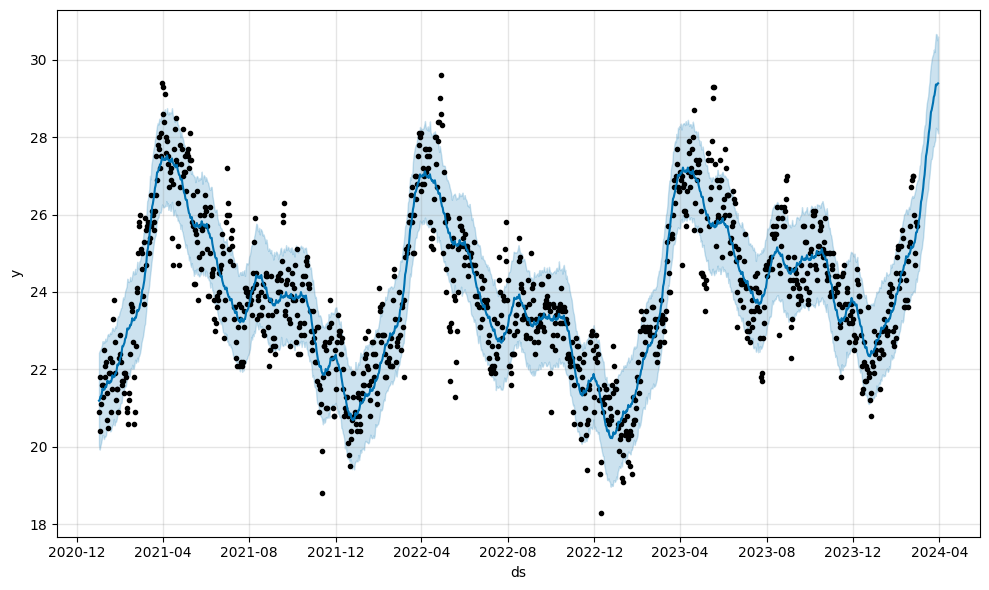

In [4]:
from prophet import Prophet

df_prophet = df.reset_index()[['datetime', 'temp']].rename(columns={'datetime': 'ds', 'temp': 'y'})
model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

model.plot(forecast)
